In [10]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


Columns:
 Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

Missing values:
 PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


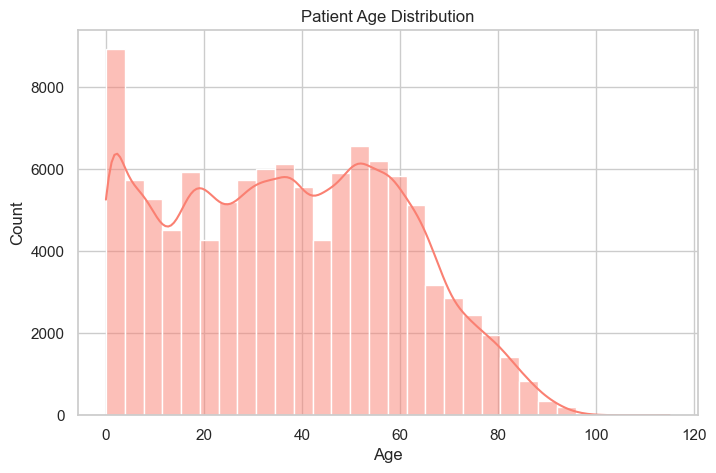

/var/folders/kl/_qlv5cv5363cjqfxm1hr5y_00000gn/T/ipykernel_2990/3401243261.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='no_show', data=df, palette='Set2')


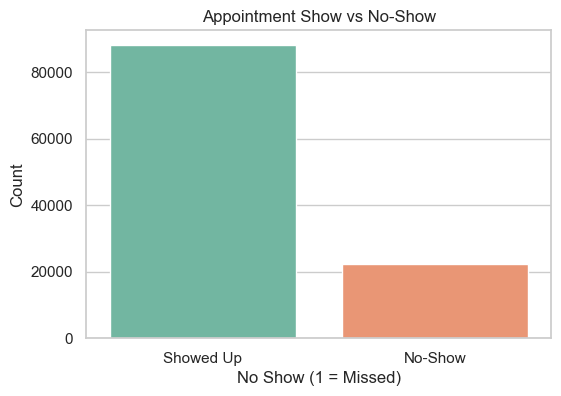

/var/folders/kl/_qlv5cv5363cjqfxm1hr5y_00000gn/T/ipykernel_2990/3401243261.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='no_show', y='age', data=df, palette='muted')


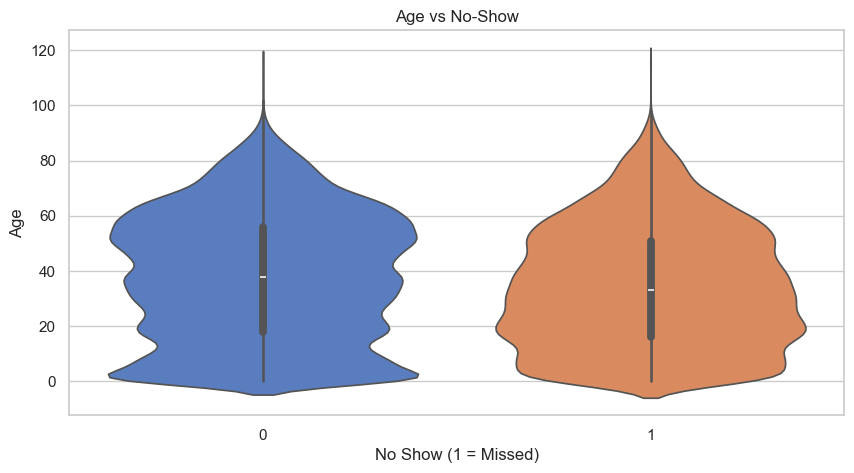

/var/folders/kl/_qlv5cv5363cjqfxm1hr5y_00000gn/T/ipykernel_2990/3401243261.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='no_show', y='days_waited', data=df, palette='coolwarm')


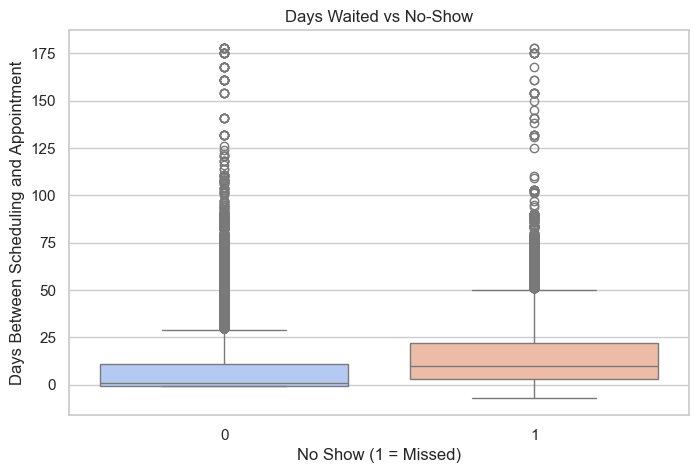

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("MM.csv")

# Show column names and basic info
print("Columns:\n", df.columns)
print("\nMissing values:\n", df.isnull().sum())

# Rename columns to clean format
df.columns = df.columns.str.strip().str.lower().str.replace('-', '_')

# Convert date columns to datetime
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

# Convert 'no_show' to binary: 'Yes' = 1 (No-show), 'No' = 0 (Showed up)
df['no_show'] = df['no_show'].map({'Yes': 1, 'No': 0})

# Create new feature: days between scheduling and appointment
df['days_waited'] = (df['appointmentday'] - df['scheduledday']).dt.days

# Remove unrealistic values
df = df[df['age'] >= 0]  # Remove negative ages

# ---------------------- 📊 VISUALIZATIONS ----------------------

sns.set(style='whitegrid')

# Histogram: Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=30, kde=True, color='salmon')
plt.title('Patient Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Countplot: Show vs No-Show
plt.figure(figsize=(6, 4))
sns.countplot(x='no_show', data=df, palette='Set2')
plt.title('Appointment Show vs No-Show')
plt.xlabel('No Show (1 = Missed)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Showed Up', 'No-Show'])
plt.show()

# Violin Plot: Age vs No-Show
plt.figure(figsize=(10, 5))
sns.violinplot(x='no_show', y='age', data=df, palette='muted')
plt.title('Age vs No-Show')
plt.xlabel('No Show (1 = Missed)')
plt.ylabel('Age')
plt.show()

# Boxplot: Days Waited vs No-Show
plt.figure(figsize=(8, 5))
sns.boxplot(x='no_show', y='days_waited', data=df, palette='coolwarm')
plt.title('Days Waited vs No-Show')
plt.xlabel('No Show (1 = Missed)')
plt.ylabel('Days Between Scheduling and Appointment')
plt.show()
